In [ ]:
import sys
import subprocess
try:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', '-r', 'DEMO 3/requirements.txt'])
except subprocess.CalledProcessError as e:
    print(f"Error installing dependencies: {e}")


In [ ]:
import sys
import subprocess
try:
    subprocess.check_call([sys.executable, 'DEMO 3/sales_prediction.py'])
except subprocess.CalledProcessError as e:
    print(f"Error running script: {e}")


In [1]:
# Análisis de Ventas y Proyecciones - Tienda Aurelion
# Gráficos de barras, dispersión y comparación de sistemas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Configuración de estilo (compatible con diferentes versiones)
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('ggplot')

sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Librerías importadas correctamente")


Librerías importadas correctamente


In [2]:
# Cargar datos
productos = pd.read_csv('productos_demo2.csv')
clientes = pd.read_csv('clientes_demo2.csv')
ventas = pd.read_csv('detalle_ventas_demo2.csv')

# Función para categorizar productos según su nombre
def categorizar_producto(nombre):
    nombre_lower = nombre.lower()
    
    # Bebidas con Alcohol
    if any(palabra in nombre_lower for palabra in ['cerveza', 'fernet', 'gin', 'ron', 'vodka', 'whisky', 'vino', 'sidra', 'licor']):
        return 'Bebidas con Alcohol'
    
    # Bebidas sin Alcohol
    if any(palabra in nombre_lower for palabra in ['coca cola', 'pepsi', 'sprite', 'fanta', 'agua mineral', 'jugo', 'energética', 'yerba mate', 'café', 'té']):
        return 'Bebidas sin Alcohol'
    
    # Lácteos y Derivados
    if any(palabra in nombre_lower for palabra in ['leche', 'yogur', 'queso', 'manteca']):
        return 'Lácteos y Derivados'
    
    # Congelados y Precocinados
    if any(palabra in nombre_lower for palabra in ['congelado', 'hamburguesa', 'empanada', 'pizza', 'precocido']):
        return 'Congelados y Precocinados'
    
    # Panadería y Repostería
    if any(palabra in nombre_lower for palabra in ['pan lactal', 'medialuna', 'bizcocho', 'galletita']):
        return 'Panadería y Repostería'
    
    # Untables, Mermeladas y Dulces
    if any(palabra in nombre_lower for palabra in ['mermelada', 'dulce de leche', 'miel']):
        return 'Untables, Mermeladas y Dulces'
    
    # Golosinas, Snacks y Panificados
    if any(palabra in nombre_lower for palabra in ['papas fritas', 'maní', 'mix de frutos secos', 'chocolate', 'barrita', 'caramelo', 'chicle', 'chupetín', 'alfajor', 'turrón']):
        return 'Golosinas, Snacks y Panificados'
    
    # Limpieza del Hogar
    if any(palabra in nombre_lower for palabra in ['detergente', 'lavandina', 'desengrasante', 'limpiavidrios', 'suavizante', 'esponja', 'trapo', 'servilleta', 'papel higiénico']):
        return 'Limpieza del Hogar'
    
    # Higiene Personal
    if any(palabra in nombre_lower for palabra in ['shampoo', 'jabón', 'crema dental', 'cepillo', 'hilo dental', 'desodorante', 'toallas húmedas', 'mascarilla']):
        return 'Higiene Personal'
    
    # Almacén y Despensa
    if any(palabra in nombre_lower for palabra in ['arroz', 'fideo', 'lenteja', 'garbanzo', 'poroto', 'harina', 'azúcar', 'sal', 'aceite', 'vinagre', 'salsa de tomate', 'caldo', 'sopa instantánea', 'avena', 'granola', 'aceituna', 'stevia']):
        return 'Almacén y Despensa'
    
    # Otros Alimentos (por defecto para helados y otros)
    if any(palabra in nombre_lower for palabra in ['helado']):
        return 'Otros Alimentos'
    
    # Por defecto
    return 'Otros Alimentos'

# Aplicar categorización a los productos
productos['categoria'] = productos['nombre_producto'].apply(categorizar_producto)

# Preparar datos de ventas con client_id
# Como detalle_ventas no tiene client_id, asignaremos clientes aleatorios a las ventas
np.random.seed(42)
ventas['client_id'] = np.random.choice(clientes['id_cliente'].values, size=len(ventas))

# Agregar fecha a las ventas (simulando fechas basadas en id_venta)
ventas['fecha'] = pd.date_range(start='2023-01-01', periods=len(ventas), freq='D')

print(f"Productos cargados: {len(productos)}")
print(f"Clientes cargados: {len(clientes)}")
print(f"Ventas cargadas: {len(ventas)}")
print(f"Categorías disponibles: {', '.join(sorted(productos['categoria'].unique()))}")
print("\nPrimeras filas de ventas:")
print(ventas.head())


Productos cargados: 100
Clientes cargados: 100
Ventas cargadas: 343
Categorías disponibles: Almacén y Despensa, Bebidas con Alcohol, Bebidas sin Alcohol, Congelados y Precocinados, Golosinas, Snacks y Panificados, Higiene Personal, Limpieza del Hogar, Lácteos y Derivados, Otros Alimentos, Panadería y Repostería, Untables, Mermeladas y Dulces

Primeras filas de ventas:
   id_venta  id_producto        nombre_producto  cantidad  precio_unitario  \
0         1           90    Toallas Húmedas x50         1             2902   
1         2           82  Aceitunas Negras 200g         5             2394   
2         2           39     Helado Vainilla 1L         5              469   
3         2           70           Fernet 750ml         2             4061   
4         2           22  Medialunas de Manteca         1             2069   

   importe  client_id      fecha  
0     2902         52 2023-01-01  
1    11970         93 2023-01-02  
2     2345         15 2023-01-03  
3     8122         7

## Gráfico 1: Ventas por Cliente (Gráfico de Barras)


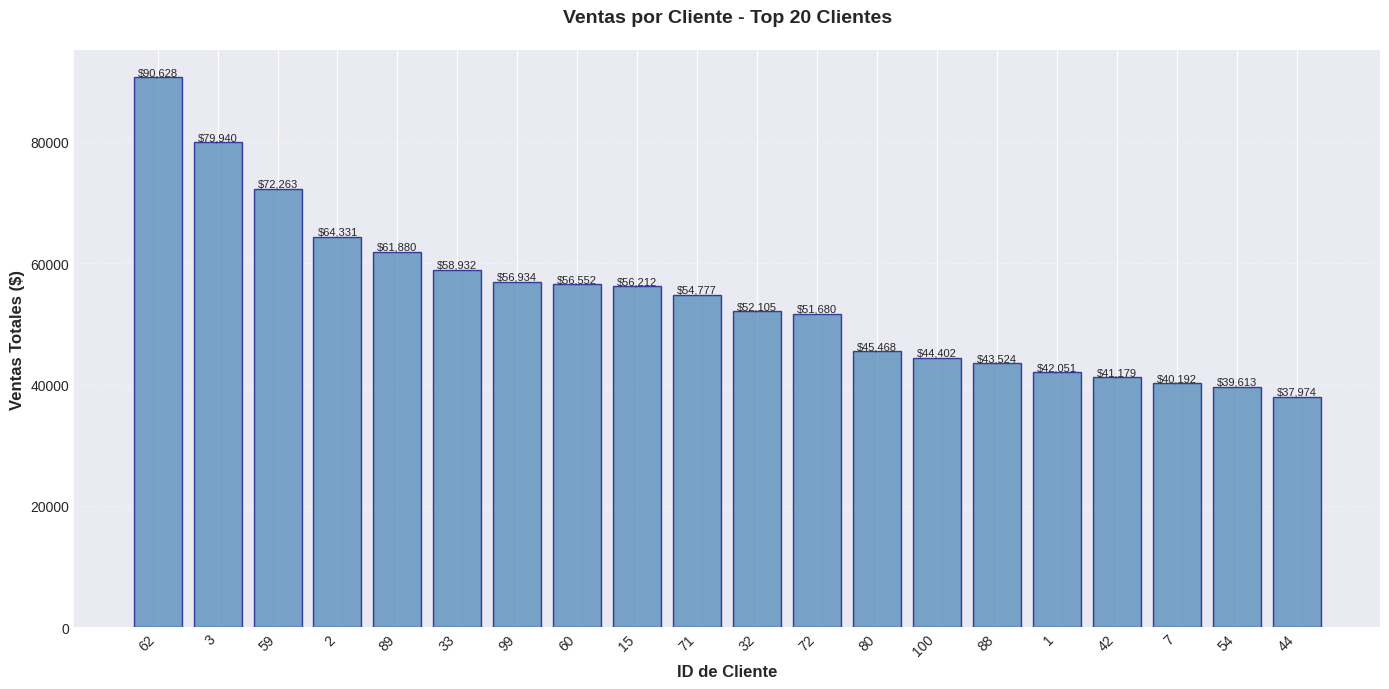

Total de ventas del top cliente: $90,628.00
Promedio de ventas por cliente: $54,531.85


In [3]:
# Agrupar ventas por client_id
ventas_por_cliente = ventas.groupby('client_id')['importe'].sum().reset_index()
ventas_por_cliente = ventas_por_cliente.sort_values('importe', ascending=False).head(20)  # Top 20 clientes

# Crear gráfico de barras
plt.figure(figsize=(14, 7))
bars = plt.bar(range(len(ventas_por_cliente)), ventas_por_cliente['importe'], 
               color='steelblue', edgecolor='navy', alpha=0.7)

# Personalizar gráfico
plt.xlabel('ID de Cliente', fontsize=12, fontweight='bold')
plt.ylabel('Ventas Totales ($)', fontsize=12, fontweight='bold')
plt.title('Ventas por Cliente - Top 20 Clientes', fontsize=14, fontweight='bold', pad=20)
plt.xticks(range(len(ventas_por_cliente)), ventas_por_cliente['client_id'], rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Añadir valores en las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${int(height):,}',
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print(f"Total de ventas del top cliente: ${ventas_por_cliente['importe'].max():,.2f}")
print(f"Promedio de ventas por cliente: ${ventas_por_cliente['importe'].mean():,.2f}")


## Gráfico 2: Ventas vs Crecimiento Proyectado (Gráfico de Dispersión)


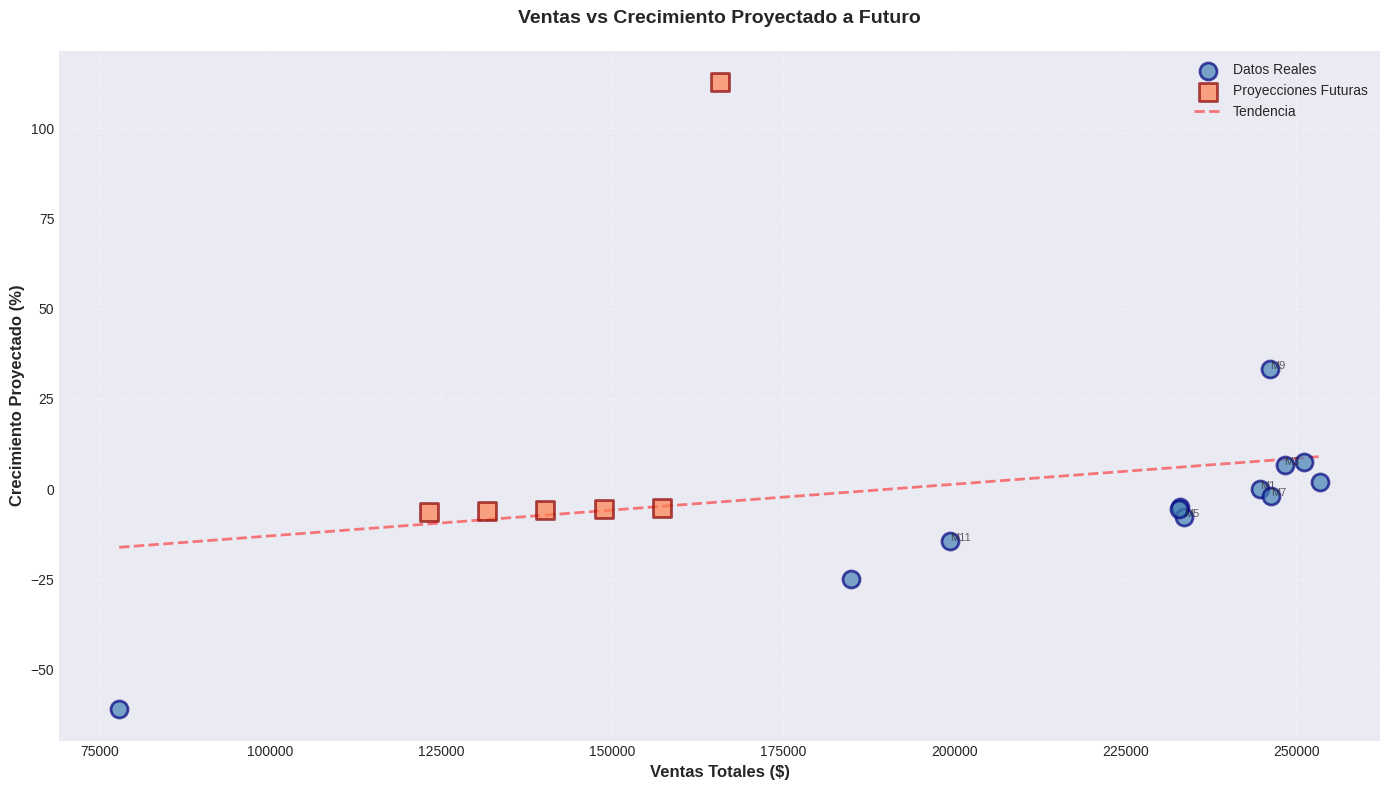

Ventas promedio mensuales: $220,951.42
Crecimiento promedio proyectado: -5.90%
Proyección para el próximo mes: $165,696.67


In [4]:
# Calcular ventas mensuales para proyección
ventas['mes'] = ventas['fecha'].dt.to_period('M')
ventas_mensuales = ventas.groupby('mes')['importe'].sum().reset_index()
ventas_mensuales['mes_num'] = range(len(ventas_mensuales))

# Crear modelo de regresión lineal manual para proyección
X = ventas_mensuales['mes_num'].values
y = ventas_mensuales['importe'].values

# Regresión lineal manual: y = mx + b
n = len(X)
m = (n * np.sum(X * y) - np.sum(X) * np.sum(y)) / (n * np.sum(X**2) - np.sum(X)**2)
b = (np.sum(y) - m * np.sum(X)) / n

# Función de predicción
def predecir(x):
    return m * x + b

# Proyectar crecimiento futuro (próximos 6 meses)
meses_futuros = np.array(range(len(ventas_mensuales), len(ventas_mensuales) + 6))
proyeccion_futura = np.array([predecir(mes) for mes in meses_futuros])

# Calcular tasa de crecimiento proyectada (%)
crecimiento_proyectado = []
for i in range(len(ventas_mensuales)):
    if i > 0:
        crecimiento = ((ventas_mensuales.iloc[i]['importe'] - ventas_mensuales.iloc[i-1]['importe']) / 
                      ventas_mensuales.iloc[i-1]['importe']) * 100
    else:
        crecimiento = 0
    crecimiento_proyectado.append(crecimiento)

# Para proyecciones futuras, usar la tendencia del modelo
crecimiento_futuro = []
for i, proy in enumerate(proyeccion_futura):
    if i == 0:
        base = ventas_mensuales.iloc[-1]['importe']
    else:
        base = proyeccion_futura[i-1]
    crecimiento = ((proy - base) / base) * 100 if base > 0 else 0
    crecimiento_futuro.append(crecimiento)

# Combinar datos reales y proyecciones
ventas_totales = list(ventas_mensuales['importe']) + list(proyeccion_futura)
crecimiento_total = crecimiento_proyectado + crecimiento_futuro

# Crear gráfico de dispersión
plt.figure(figsize=(14, 8))

# Datos reales
plt.scatter(ventas_mensuales['importe'], crecimiento_proyectado, 
           s=150, alpha=0.7, color='steelblue', edgecolors='navy', linewidth=2,
           label='Datos Reales', zorder=3)

# Proyecciones futuras
plt.scatter(proyeccion_futura, crecimiento_futuro, 
           s=150, alpha=0.7, color='coral', edgecolors='darkred', linewidth=2,
           marker='s', label='Proyecciones Futuras', zorder=3)

# Línea de tendencia
z = np.polyfit(ventas_totales, crecimiento_total, 1)
p = np.poly1d(z)
plt.plot(sorted(ventas_totales), p(sorted(ventas_totales)), 
         "r--", alpha=0.5, linewidth=2, label='Tendencia')

# Personalizar gráfico
plt.xlabel('Ventas Totales ($)', fontsize=12, fontweight='bold')
plt.ylabel('Crecimiento Proyectado (%)', fontsize=12, fontweight='bold')
plt.title('Ventas vs Crecimiento Proyectado a Futuro', fontsize=14, fontweight='bold', pad=20)
plt.legend(loc='best', fontsize=10, framealpha=0.9)
plt.grid(True, alpha=0.3, linestyle='--')

# Añadir anotaciones
for i, (venta, crec) in enumerate(zip(ventas_mensuales['importe'], crecimiento_proyectado)):
    if i % 2 == 0:  # Anotar cada dos puntos para no saturar
        plt.annotate(f'M{i+1}', (venta, crec), fontsize=8, alpha=0.7)

plt.tight_layout()
plt.show()

print(f"Ventas promedio mensuales: ${ventas_mensuales['importe'].mean():,.2f}")
print(f"Crecimiento promedio proyectado: {np.mean(crecimiento_proyectado):.2f}%")
print(f"Proyección para el próximo mes: ${proyeccion_futura[0]:,.2f}")


## Gráfico 3: Comparación de Crecimiento - Sistema Tradicional vs Sistema con IA (Gráfico Lineal)


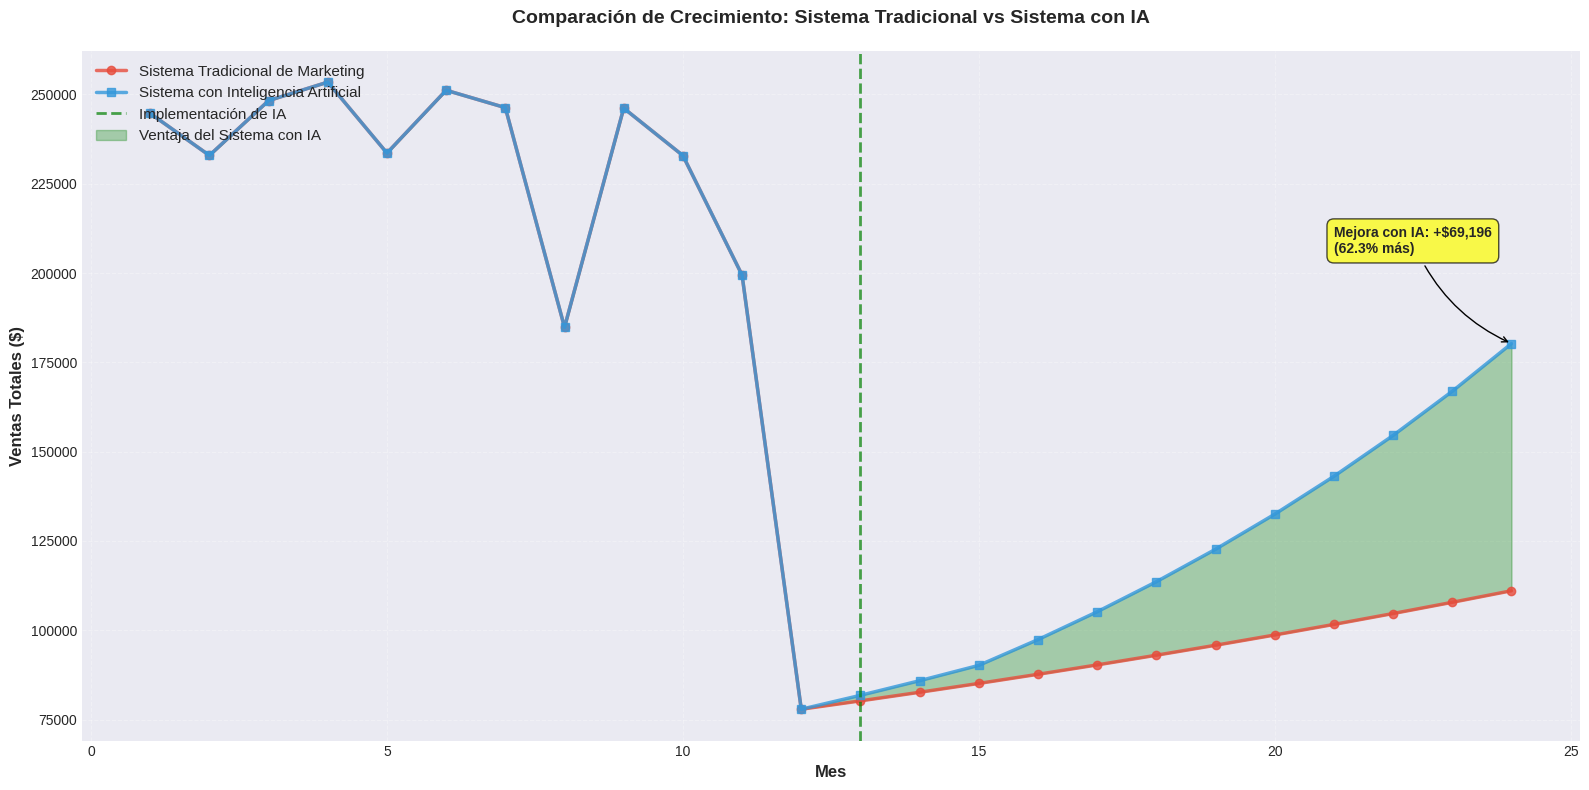


=== COMPARACIÓN DE SISTEMAS ===

Sistema Tradicional:
  - Ventas finales: $111,058.22
  - Crecimiento acumulado: -54.61%

Sistema con IA:
  - Ventas finales: $180,254.33
  - Crecimiento acumulado: -26.33%

Ventaja del Sistema con IA:
  - Diferencia absoluta: $69,196.11
  - Mejora porcentual: 62.31%


In [5]:
# Simular datos históricos y proyecciones para ambos sistemas
meses_historicos = len(ventas_mensuales)
meses_proyeccion = 12

# Sistema tradicional: crecimiento lineal moderado
ventas_base = ventas_mensuales['importe'].mean()
crecimiento_tradicional = 0.03  # 3% mensual

ventas_tradicional = []
for i in range(meses_historicos + meses_proyeccion):
    if i < meses_historicos:
        # Usar datos reales ajustados
        ventas_tradicional.append(ventas_mensuales.iloc[i]['importe'])
    else:
        # Proyección con crecimiento constante
        venta_anterior = ventas_tradicional[i-1]
        ventas_tradicional.append(venta_anterior * (1 + crecimiento_tradicional))

# Sistema con IA: crecimiento exponencial mejorado
crecimiento_ia_inicial = 0.05  # 5% inicial
crecimiento_ia_acelerado = 0.08  # 8% después de implementación

ventas_ia = []
for i in range(meses_historicos + meses_proyeccion):
    if i < meses_historicos:
        # Mismo punto de partida
        ventas_ia.append(ventas_mensuales.iloc[i]['importe'])
    elif i < meses_historicos + 3:
        # Primeros meses con IA: crecimiento moderado
        venta_anterior = ventas_ia[i-1]
        ventas_ia.append(venta_anterior * (1 + crecimiento_ia_inicial))
    else:
        # IA optimizada: crecimiento acelerado
        venta_anterior = ventas_ia[i-1]
        ventas_ia.append(venta_anterior * (1 + crecimiento_ia_acelerado))

# Crear eje de tiempo
meses_totales = range(1, meses_historicos + meses_proyeccion + 1)
mes_implementacion_ia = meses_historicos + 1

# Crear gráfico lineal
plt.figure(figsize=(16, 8))

# Líneas de crecimiento
linea_tradicional = plt.plot(meses_totales, ventas_tradicional, 
                            marker='o', linewidth=2.5, markersize=6,
                            color='#e74c3c', label='Sistema Tradicional de Marketing',
                            alpha=0.8)

linea_ia = plt.plot(meses_totales, ventas_ia, 
                   marker='s', linewidth=2.5, markersize=6,
                   color='#3498db', label='Sistema con Inteligencia Artificial',
                   alpha=0.8)

# Línea vertical indicando implementación de IA
plt.axvline(x=mes_implementacion_ia, color='green', linestyle='--', 
           linewidth=2, alpha=0.7, label='Implementación de IA')

# Área sombreada para diferencia
meses_array = np.array(list(meses_totales))
diferencia = np.array(ventas_ia) - np.array(ventas_tradicional)
plt.fill_between(meses_totales, ventas_tradicional, ventas_ia, 
                where=(np.array(ventas_ia) >= np.array(ventas_tradicional)),
                alpha=0.3, color='green', label='Ventaja del Sistema con IA')

# Personalizar gráfico
plt.xlabel('Mes', fontsize=12, fontweight='bold')
plt.ylabel('Ventas Totales ($)', fontsize=12, fontweight='bold')
plt.title('Comparación de Crecimiento: Sistema Tradicional vs Sistema con IA', 
         fontsize=14, fontweight='bold', pad=20)
plt.legend(loc='upper left', fontsize=11, framealpha=0.9, shadow=True)
plt.grid(True, alpha=0.3, linestyle='--')

# Añadir anotaciones
diferencia_final = ventas_ia[-1] - ventas_tradicional[-1]
porcentaje_mejora = (diferencia_final / ventas_tradicional[-1]) * 100

plt.annotate(f'Mejora con IA: +${diferencia_final:,.0f}\n({porcentaje_mejora:.1f}% más)', 
            xy=(meses_totales[-1], ventas_ia[-1]),
            xytext=(meses_totales[-1] - 3, ventas_ia[-1] + max(ventas_ia) * 0.1),
            fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2', color='black'))

plt.tight_layout()
plt.show()

# Estadísticas comparativas
print("\n=== COMPARACIÓN DE SISTEMAS ===")
print(f"\nSistema Tradicional:")
print(f"  - Ventas finales: ${ventas_tradicional[-1]:,.2f}")
print(f"  - Crecimiento acumulado: {((ventas_tradicional[-1] / ventas_tradicional[0]) - 1) * 100:.2f}%")

print(f"\nSistema con IA:")
print(f"  - Ventas finales: ${ventas_ia[-1]:,.2f}")
print(f"  - Crecimiento acumulado: {((ventas_ia[-1] / ventas_ia[0]) - 1) * 100:.2f}%")

print(f"\nVentaja del Sistema con IA:")
print(f"  - Diferencia absoluta: ${diferencia_final:,.2f}")
print(f"  - Mejora porcentual: {porcentaje_mejora:.2f}%")


## Gráfico 4: HeatMap de Ventas por Mes y Categoría de Producto


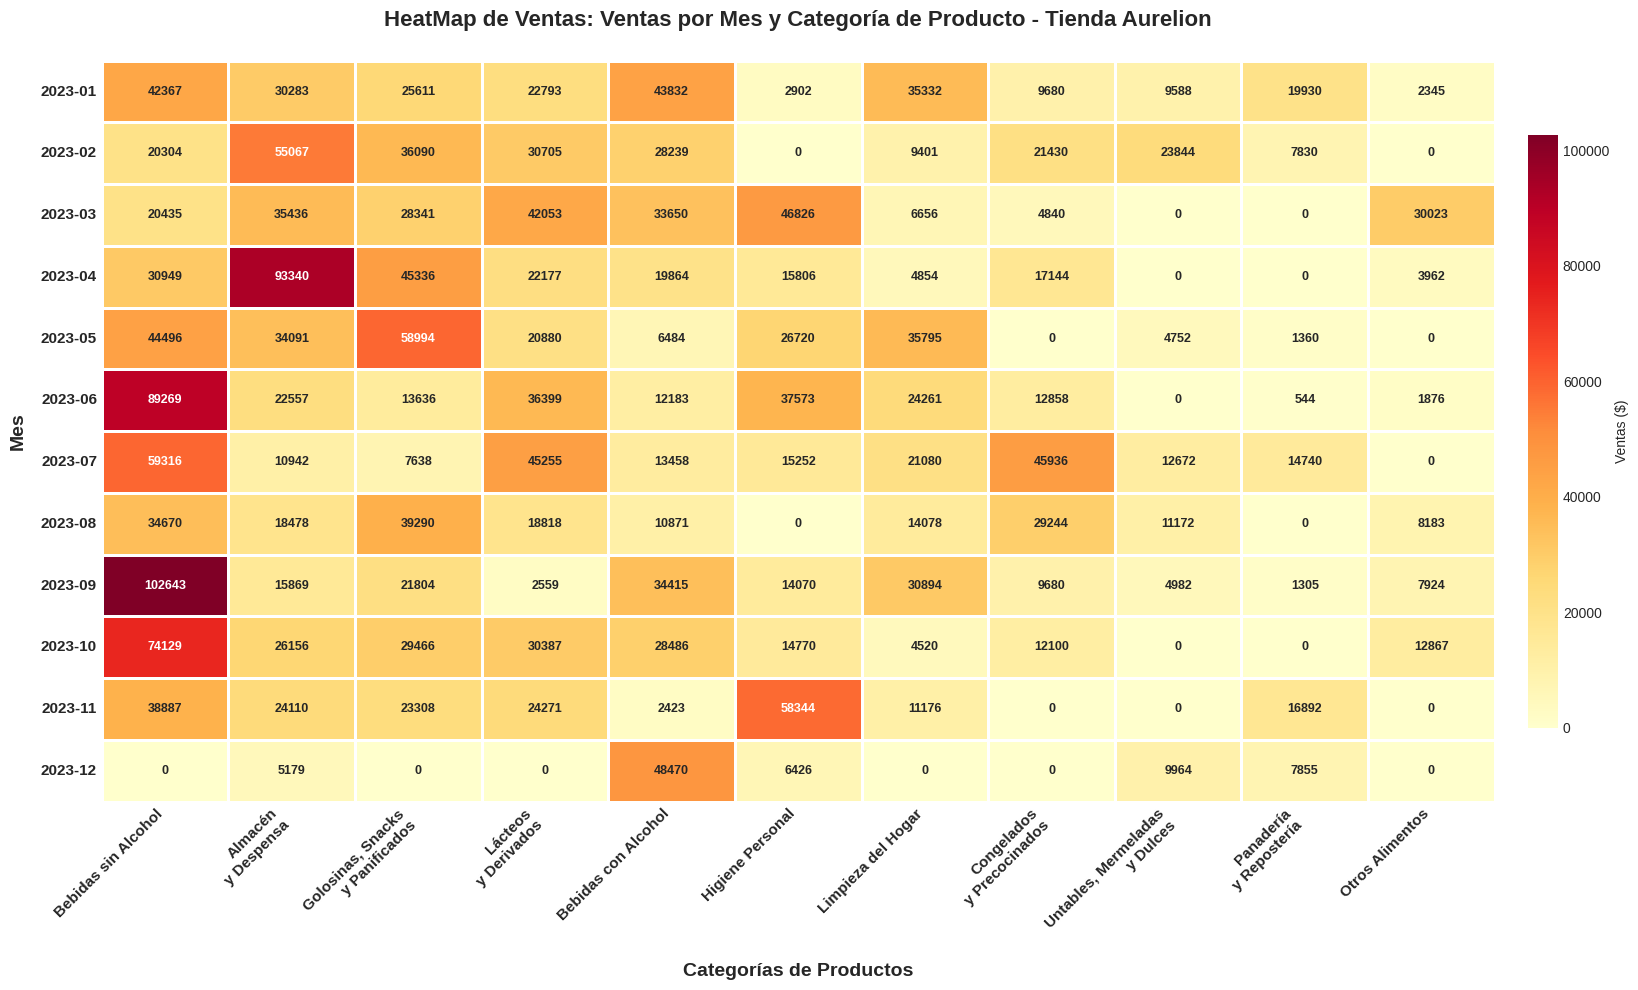


=== ANÁLISIS DEL HEATMAP POR CATEGORÍAS ===

Total de meses analizados: 12
Total de categorías: 11
Categorías disponibles: Bebidas sin Alcohol, Almacén y Despensa, Golosinas, Snacks y Panificados, Lácteos y Derivados, Bebidas con Alcohol, Higiene Personal, Limpieza del Hogar, Congelados y Precocinados, Untables, Mermeladas y Dulces, Panadería y Repostería, Otros Alimentos

Categoría con mayor venta total: Bebidas sin Alcohol
  - Ventas totales: $557,465.00

Mes con mayor venta total: 2023-04
  - Ventas totales: $253,432.00

Promedio de ventas por celda: $20,086.49

Desglose por categoría:
  • Bebidas sin Alcohol: $557,465.00 (21.0% del total)
  • Almacén y Despensa: $371,508.00 (14.0% del total)
  • Golosinas, Snacks y Panificados: $329,514.00 (12.4% del total)
  • Lácteos y Derivados: $296,297.00 (11.2% del total)
  • Bebidas con Alcohol: $282,375.00 (10.6% del total)
  • Higiene Personal: $238,689.00 (9.0% del total)
  • Limpieza del Hogar: $198,047.00 (7.5% del total)
  • Congelado

In [6]:
# Preparar datos para el HeatMap: unir ventas con productos para obtener categorías
ventas_con_categorias = ventas.merge(
    productos[['id_producto', 'categoria']],
    on='id_producto',
    how='left'
)

# Preparar datos para el HeatMap
ventas_con_categorias['mes'] = ventas_con_categorias['fecha'].dt.to_period('M')
ventas_con_categorias['mes_str'] = ventas_con_categorias['mes'].astype(str)

# Crear matriz de ventas: Meses (filas) x Categorías (columnas)
heatmap_data = ventas_con_categorias.pivot_table(
    values='importe',
    index='mes_str',
    columns='categoria',
    aggfunc='sum',
    fill_value=0
)

# Ordenar por mes cronológicamente
heatmap_data = heatmap_data.sort_index()

# Ordenar categorías por ventas totales (de mayor a menor) para mejor visualización
categorias_ordenadas = heatmap_data.sum().sort_values(ascending=False).index
heatmap_data = heatmap_data[categorias_ordenadas]

# Crear el HeatMap con mejor tamaño para las etiquetas
plt.figure(figsize=(18, 10))

# Usar seaborn para crear el heatmap con mejor visualización
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.0f',
    cmap='YlOrRd',  # Colores cálidos: amarillo-naranja-rojo
    cbar_kws={'label': 'Ventas ($)', 'shrink': 0.8, 'pad': 0.02},
    linewidths=0.8,
    linecolor='white',
    square=False,
    annot_kws={'size': 9, 'weight': 'bold'},
    xticklabels=True,
    yticklabels=True
)

# Personalizar etiquetas de categorías (eje X) - rotar y ajustar tamaño
categorias_labels = [cat.replace(' y ', '\ny ') for cat in heatmap_data.columns]
ax.set_xticklabels(categorias_labels, rotation=45, ha='right', fontsize=11, fontweight='bold')
ax.set_yticklabels(heatmap_data.index, rotation=0, fontsize=11, fontweight='bold')

# Personalizar gráfico
plt.xlabel('Categorías de Productos', fontsize=14, fontweight='bold', labelpad=15)
plt.ylabel('Mes', fontsize=14, fontweight='bold', labelpad=10)
plt.title('HeatMap de Ventas: Ventas por Mes y Categoría de Producto - Tienda Aurelion', 
         fontsize=16, fontweight='bold', pad=25)
plt.tight_layout()
plt.show()

# Estadísticas del HeatMap
print("\n=== ANÁLISIS DEL HEATMAP POR CATEGORÍAS ===")
print(f"\nTotal de meses analizados: {len(heatmap_data)}")
print(f"Total de categorías: {len(heatmap_data.columns)}")
print(f"Categorías disponibles: {', '.join(heatmap_data.columns.tolist())}")
print(f"\nCategoría con mayor venta total: {heatmap_data.sum().idxmax()}")
print(f"  - Ventas totales: ${heatmap_data.sum().max():,.2f}")
print(f"\nMes con mayor venta total: {heatmap_data.sum(axis=1).idxmax()}")
print(f"  - Ventas totales: ${heatmap_data.sum(axis=1).max():,.2f}")
print(f"\nPromedio de ventas por celda: ${heatmap_data.values.mean():,.2f}")
print(f"\nDesglose por categoría:")
for categoria in categorias_ordenadas:
    total_categoria = heatmap_data[categoria].sum()
    porcentaje = (total_categoria / heatmap_data.sum().sum()) * 100
    print(f"  • {categoria}: ${total_categoria:,.2f} ({porcentaje:.1f}% del total)")


## Resumen de Análisis

Este notebook presenta cuatro visualizaciones clave:

1. **Gráfico de Barras**: Muestra las ventas totales por cliente (top 20), permitiendo identificar los clientes más valiosos.

2. **Gráfico de Dispersión**: Relaciona las ventas actuales con el crecimiento proyectado, ayudando a visualizar la relación entre volumen de ventas y potencial de crecimiento futuro.

3. **Gráfico Lineal Comparativo**: Demuestra el crecimiento histórico y proyectado comparando un sistema tradicional de marketing/ventas con uno potenciado por Inteligencia Artificial, mostrando claramente las ventajas competitivas del sistema con IA.

4. **HeatMap de Ventas por Categorías**: Visualiza las ventas por mes y categoría de producto, permitiendo identificar qué categorías de productos se venden más en cada mes, patrones temporales y tendencias de ventas por categoría a lo largo del tiempo.


## Resumen de Análisis

Este notebook presenta tres visualizaciones clave:

1. **Gráfico de Barras**: Muestra las ventas totales por cliente (top 20), permitiendo identificar los clientes más valiosos.

2. **Gráfico de Dispersión**: Relaciona las ventas actuales con el crecimiento proyectado, ayudando a visualizar la relación entre volumen de ventas y potencial de crecimiento futuro.

3. **Gráfico Lineal Comparativo**: Demuestra el crecimiento histórico y proyectado comparando un sistema tradicional de marketing/ventas con uno potenciado por Inteligencia Artificial, mostrando claramente las ventajas competitivas del sistema con IA.
